In [6]:
import cv2
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

2023-11-26 14:41:13.396939: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 14:41:13.397036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 14:41:13.441407: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-26 14:41:13.536227: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-26 14:41:14.623395: W tensorflow/compiler/tf2

In [3]:
x = []
y = []

In [4]:
class_label_encoding = {
    'Kirmizi_Pistachio': 0,
    'Siirt_Pistachio': 1
}

In [7]:
# original image shape is (600, 600, 3)
# we are changing the shape to (200, 200, 1)

parent_dir = 'Pistachio_Image_Dataset/Pistachio_Image_Dataset'

for directory in os.listdir(parent_dir):
    if('.txt' in directory): continue
    for file in os.listdir(parent_dir+'/'+directory):
        image_path = parent_dir+'/'+directory+'/'+file
        img = cv2.imread(image_path,0).astype('float32') # convert images as grayscale
        img = cv2.resize(img, (200, 200), interpolation = cv2.INTER_AREA)
        img/=255.
        x.append(img)
        y.append(class_label_encoding[directory])

In [8]:
x = np.array(x)
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
x.shape

(2148, 200, 200, 1)

In [9]:
y = np.array(y)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=987654, stratify=y)
del x, y

In [15]:
print('Train set')
print('class 0:', y_train.shape[0] - y_train.sum())
print('class 1:', y_train.sum())

print()

print('Test set')
print('class 0:', y_test.shape[0] - y_test.sum())
print('class 1:', y_test.sum())


Train set
class 0: 924
class 1: 687

Test set
class 0: 308
class 1: 229


In [22]:
model = Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,1)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())


model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,'sigmoid'))

model.compile('Adam','binary_crossentropy',['accuracy'])

print(model.summary())

2023-11-26 19:04:58.902786: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 231211008 exceeds 10% of free system memory.
2023-11-26 19:04:59.046088: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 231211008 exceeds 10% of free system memory.
2023-11-26 19:04:59.208972: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 231211008 exceeds 10% of free system memory.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 94, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 47, 47, 128)       0         
 g2D)                                                   

In [23]:
# Menampilkan jumlah total bobot
total_weights = sum([var.numpy().flatten().shape[0] for var in model.trainable_variables])

print("Jumlah Total Bobot pada Model:", total_weights)

Jumlah Total Bobot pada Model: 59081281


In [29]:
#Jumlah Total Hidden Node per Layer

conv2D = 32
conv2D_1 = 64
conv2D_2 = 64
conv2D_3 = 128
conv2D_4 = 256
conv2D_5 = 128
conv2D_6 = 128
dense = 1024
dense_1 = 512
dense_2 = 64
dense_3 = 1

total = conv2D + conv2D_1 + conv2D_2 + conv2D_3 + conv2D_4 + conv2D_5 + conv2D_6 + dense + dense_1 + dense_2 + dense_3

print('total hidden node = ', total)

total hidden node =  2401


In [11]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=25, callbacks=[EarlyStopping(patience=8,restore_best_weights=True)])

Epoch 1/25


2023-11-26 07:56:11.363392: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 257760000 exceeds 10% of free system memory.
2023-11-26 07:56:12.638876: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 231211008 exceeds 10% of free system memory.


13/13 [==============================] - 901s 67s/step - loss: 0.6896 - accuracy: 0.5736 - val_loss: 0.6051 - val_accuracy: 0.7169
Epoch 2/25
13/13 [==============================] - 731s 55s/step - loss: 0.4871 - accuracy: 0.7728 - val_loss: 0.4520 - val_accuracy: 0.7952
Epoch 3/25
13/13 [==============================] - 695s 53s/step - loss: 0.4202 - accuracy: 0.7989 - val_loss: 0.4486 - val_accuracy: 0.7709
Epoch 4/25
13/13 [==============================] - 607s 47s/step - loss: 0.3993 - accuracy: 0.8144 - val_loss: 0.3863 - val_accuracy: 0.8194
Epoch 5/25
13/13 [==============================] - 444s 33s/step - loss: 0.3597 - accuracy: 0.8330 - val_loss: 0.3779 - val_accuracy: 0.8287
Epoch 6/25
13/13 [==============================] - 425s 33s/step - loss: 0.3272 - accuracy: 0.8529 - val_loss: 0.3585 - val_accuracy: 0.8399
Epoch 7/25
13/13 [==============================] - 426s 33s/step - loss: 0.3057 - accuracy: 0.8678 - val_loss: 0.3468 - val_accuracy: 0.8492
Epoch 8/25
13/13 

In [12]:
model.save('pistachio.h5')

/home/fatiya/Documents/Tugas AI/Tugas-2-Kecerdasan-Artifisial-2108107010042/env/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


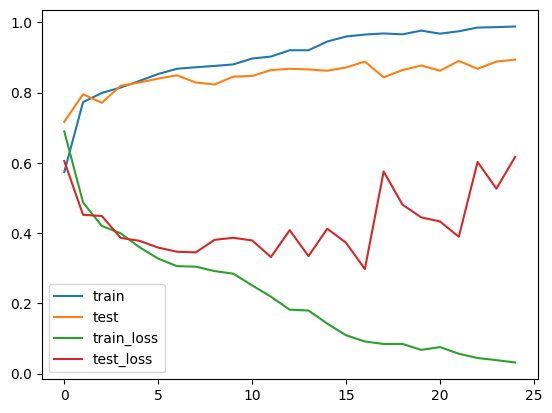

In [13]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.plot(history.history['loss'], label='train_loss')
pyplot.Dalam model tersebut, jenis optimisasi yang digunakan adalah Adam, yang merupakan singkatan dari Adaptive Moment Estimation. Adam adalah metode optimisasi yang efisien dan seringkali digunakan dalam pelatihan model jaringan saraf tiruan. Adam menggabungkan konsep Momentum dan RMSprop.

Algoritma Adam menghitung dan memanfaatkan momen pertama (mean) dan momen kedua (mean kuadrat) dari gradien parameter selama iterasi pelatihan. Dengan menggunakan informasi ini, Adam kemudian menghasilkan pembaruan parameter untuk meningkatkan efisiensi konvergensi model. Kelebihan utama dari Adam adalah kemampuannya dalam menyesuaikan laju pembelajaran secara adaptif berdasarkan momen kedua, memungkinkan algoritma untuk secara efektif dan cepat beradaptasi terhadap perubahan dalam gradien. Keistimewaan ini membuat Adam menjadi pilihan yang baik untuk berbagai masalah pelatihan model, dan seringkali menghasilkan konvergensi yang lebih cepatplot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()

In [14]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Testing accuracy:', round(acc*100,3))
print('Testing loss:', round(loss,3))

Testing accuracy: 88.827
Testing loss: 0.297


In [ ]:
from keras.callbacks import TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), batch_size=128, callbacks=[tensorboard_callback])

In [2]:
%load_ext tensorboard
%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 72137), started 0:00:34 ago. (Use '!kill 72137' to kill it.)